In [1]:
import numpy as np
import pandas as pd
import psycopg2

### Connect to Postgres DB

In [2]:
import json

with open('config.json') as f:
    conf = json.load(f)
    host = conf['host']
    database = conf['database']
    user = conf['user']
    passw = conf['passw']

In [3]:
conn_str = "host={} dbname={} user={} password={}".format(host, database, user, passw)
conn = psycopg2.connect(conn_str)

### Initial Query

In [ ]:
Vic_Off_query = "SELECT vic.victim_id AS VICTIM_ID,\
            vic.incident_id AS INCIDENT_ID,\
            date_part('year',inc.incident_date),\
            vic.victim_type_id AS VICTIM_TYPE_ID,\
            ty.victim_type_name AS VICTIM_TYPE,\
            vic.age_range_low_num AS AGE_RANGE_LOW,\
            vic.age_range_high_num AS AGE_RANGE_HIGH,\
            vic.sex_code AS VICTIM_SEX,\
            oft.crime_against AS CRIME_AGAINST,\
            oft.offense_name AS OFFENSE,\
            oft.offense_category_name AS OFFENSE_CATEGORY,\
            oft.offense_group AS OFFENSE_GROUP,\
            ofr.offender_id AS OFFENDER_ID,\
            ofr.age_num AS OFFENDER_AGE,\
            ofr.sex_code AS OFFENDER_SEX,\
            off.location_id AS LOCATION_ID,\
            loc.location_name AS LOCATION_NAME,\
            inc.ddocname AS DOC_NAME,\
            ori.fips AS FIPS,\
            ori.countyname AS COUNTY,\
            ori.name AS ORI_NAME,\
            ags.population AS POPULATION,\
            ags.population_group_desc AS POPULATION DESCRIPTION,\
            ags.total_officers AS OFFICERS,\
            ags.total_civilians AS CIVILIANS\
            FROM nibrs_victim as vic\
            JOIN nibrs_victim_type as ty\
            ON vic.victim_type_id = ty.victim_type_id\
            JOIN nibrs_offender as ofr\
            ON ofr.incident_id = vic.incident_id\
            JOIN nibrs_offense as off\
            ON off.incident_id = vic.incident_id\
            JOIN nibrs_offense_type as oft\
            ON oft.offense_type_id = off.offense_type_id\
            JOIN nibrs_location_type as loc\
            ON off.location_id = loc.location_id\
            JOIN nibrs_incident as inc\
            ON inc.incident_id = vic.incident_id\
            JOIN cde_agencies as ags\
            ON ags.agency_id = inc.agency_id\
            JOIN ori_to_fips as ori\
            ON ori.ori9 = ags.ori\
            WHERE vic.victim_type_id = 4;"

### Load into Pandas DataFrame

In [4]:
Vic_Off_df = pd.read_csv('init_query.csv')
Vic_Off_df.head(3).T

,0,1,2
victim_id,57023969,57023969,57023969
incident_id,52643345,52643345,52643345
victim_type_id,4,4,4
victim_type,Individual,Individual,Individual
age_range_low,NaN,NaN,NaN
age_range_high,NaN,NaN,NaN
victim_sex,M,M,M
crime_against,Property,Property,Property
offense,Theft of Motor Vehicle Parts or Accessories,Theft of Motor Vehicle Parts or Accessories,Theft of Motor Vehicle Parts or Accessories
offense_category,Larceny/Theft Offenses,Larceny/Theft Offenses,Larceny/Theft Offenses


In [5]:
Vic_Off_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9870208 entries, 0 to 9870207
Data columns (total 20 columns):
victim_id           int64
incident_id         int64
victim_type_id      int64
victim_type         object
age_range_low       float64
age_range_high      float64
victim_sex          object
crime_against       object
offense             object
offense_category    object
offense_group       object
offender_id         int64
offender_age        float64
offender_sex        object
location_id         int64
location_name       object
ddocname            object
fips                int64
countyname          object
name                object
dtypes: float64(3), int64(6), object(11)
memory usage: 1.5+ GB


In [8]:
Vic_Off_df = Vic_Off_df.drop_duplicates()

In [9]:
Vic_Off_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420867 entries, 0 to 9870201
Data columns (total 20 columns):
victim_id           1420867 non-null int64
incident_id         1420867 non-null int64
victim_type_id      1420867 non-null int64
victim_type         1420867 non-null object
age_range_low       219654 non-null float64
age_range_high      219654 non-null float64
victim_sex          1420867 non-null object
crime_against       1420867 non-null object
offense             1420867 non-null object
offense_category    1420867 non-null object
offense_group       1420867 non-null object
offender_id         1420867 non-null int64
offender_age        767652 non-null float64
offender_sex        1090992 non-null object
location_id         1420867 non-null int64
location_name       1420867 non-null object
ddocname            1420867 non-null object
fips                1420867 non-null int64
countyname          1420867 non-null object
name                1420867 non-null object
dtypes: float

In [10]:
Vic_Off_df.head(3).T

,0,7,14
victim_id,57023969,57023970,57023972
incident_id,52643345,52643346,52643348
victim_type_id,4,4,4
victim_type,Individual,Individual,Individual
age_range_low,NaN,NaN,NaN
age_range_high,NaN,NaN,NaN
victim_sex,M,F,F
crime_against,Property,Property,Property
offense,Theft of Motor Vehicle Parts or Accessories,Theft of Motor Vehicle Parts or Accessories,Theft From Motor Vehicle
offense_category,Larceny/Theft Offenses,Larceny/Theft Offenses,Larceny/Theft Offenses


### Count of NaN's by column

In [11]:
Vic_Off_df.isna().sum()

victim_id                 0
incident_id               0
victim_type_id            0
victim_type               0
age_range_low       1201213
age_range_high      1201213
victim_sex                0
crime_against             0
offense                   0
offense_category          0
offense_group             0
offender_id               0
offender_age         653215
offender_sex         329875
location_id               0
location_name             0
ddocname                  0
fips                      0
countyname                0
name                      0
dtype: int64

### Impute missing offender_sex as "U" (unknown)

In [12]:
Vic_Off_df.offender_sex.value_counts()

M    617716
U    248637
F    224639
Name: offender_sex, dtype: int64

In [13]:
Vic_Off_df['offender_sex'].fillna('U', inplace=True)

In [14]:
Vic_Off_df.offender_sex.value_counts()

M    617716
U    578512
F    224639
Name: offender_sex, dtype: int64

# Plot number of offenses by offender age

In [31]:
OffAges = Vic_Off_df['offender_age'].value_counts().sort_index()
OffAges

1.0      1831
2.0        17
3.0         7
4.0        39
5.0        87
6.0       114
7.0       226
8.0       386
9.0       746
10.0     1743
11.0     3264
12.0     6301
13.0    10122
14.0    14696
15.0    19975
16.0    24180
17.0    30164
18.0    32427
19.0    31793
20.0    30873
21.0    30628
22.0    32488
23.0    26344
24.0    25861
25.0    30754
26.0    23260
27.0    25557
28.0    21497
29.0    20253
30.0    24061
        ...  
68.0      547
69.0      468
70.0      474
71.0      300
72.0      305
73.0      267
74.0      252
75.0      286
76.0      174
77.0      166
78.0      132
79.0      120
80.0      116
81.0       96
82.0       81
83.0       71
84.0       69
85.0       49
86.0       33
87.0       38
88.0      141
89.0       22
90.0       23
91.0        5
92.0        3
93.0        2
94.0        6
95.0        3
96.0        4
98.0        4
Name: offender_age, Length: 97, dtype: int64

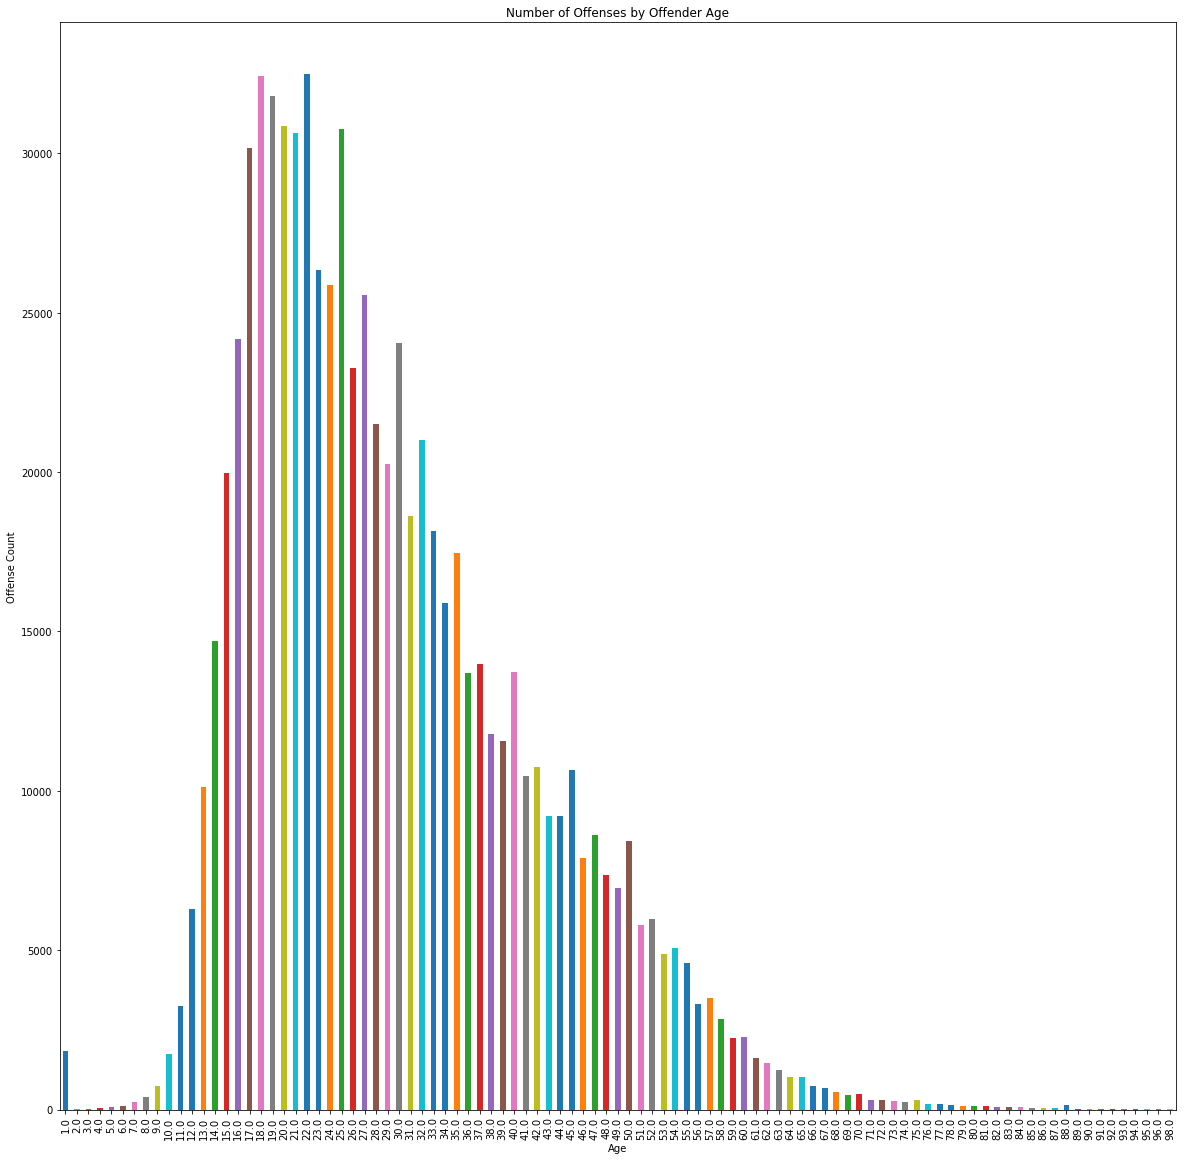

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

OffAges.plot.bar(figsize = (20,20))
plt.title('Number of Offenses by Offender Age')
plt.xlabel('Age')
plt.ylabel('Offense Count')
plt.show()

# Plot Victim Count by Gender and County

In [21]:
small_df = Vic_Off_df[['victim_sex','fips']]

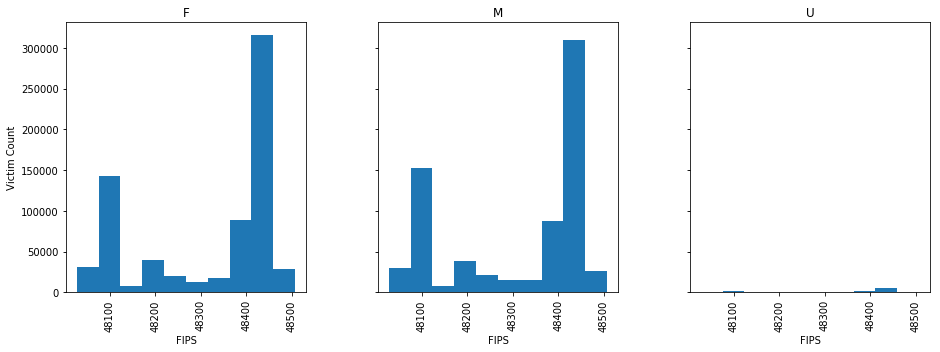

In [23]:
small_df.columns = ['victim_sex','fips']

axarr = small_df.hist(column='fips', by = 'victim_sex', sharex=True, sharey=True, layout = (1, 3), figsize=(15,5))

for ax in axarr.flatten():
    ax.set_xlabel("FIPS")
    ax.set_ylabel("Victim Count")

# Plot total number of victims by FIPS

In [29]:
FIPS_Vics = pd.value_counts(small_df['fips'].values, sort=True)
FIPS_Vics

48439    504045
48085    167731
48375    130819
48121     84704
48451     65809
48423     57953
48183     55419
48113     44702
48469     38709
48039     26446
48027     23271
48257     22070
48339     21886
48251     16271
48397     15082
48401     14098
48309     13438
48303     12784
48201     10160
48491      9998
48167      9514
48373      9348
48181      8213
48347      6083
48057      5530
48367      5021
48157      4800
48053      4422
48353      4250
48481      3789
          ...  
48471      1194
48175       935
48285       916
48231       821
48457       619
48029       573
48411       557
48299       552
48233       435
48215       365
48507       364
48259       324
48497       232
48245       226
48489       204
48099       176
48281       164
48043       157
48381       117
48197       106
48277       105
48331        60
48289        58
48357        56
48419        42
48313        35
48503        35
48427        33
48061         7
48081         2
Length: 68, dtype: int64

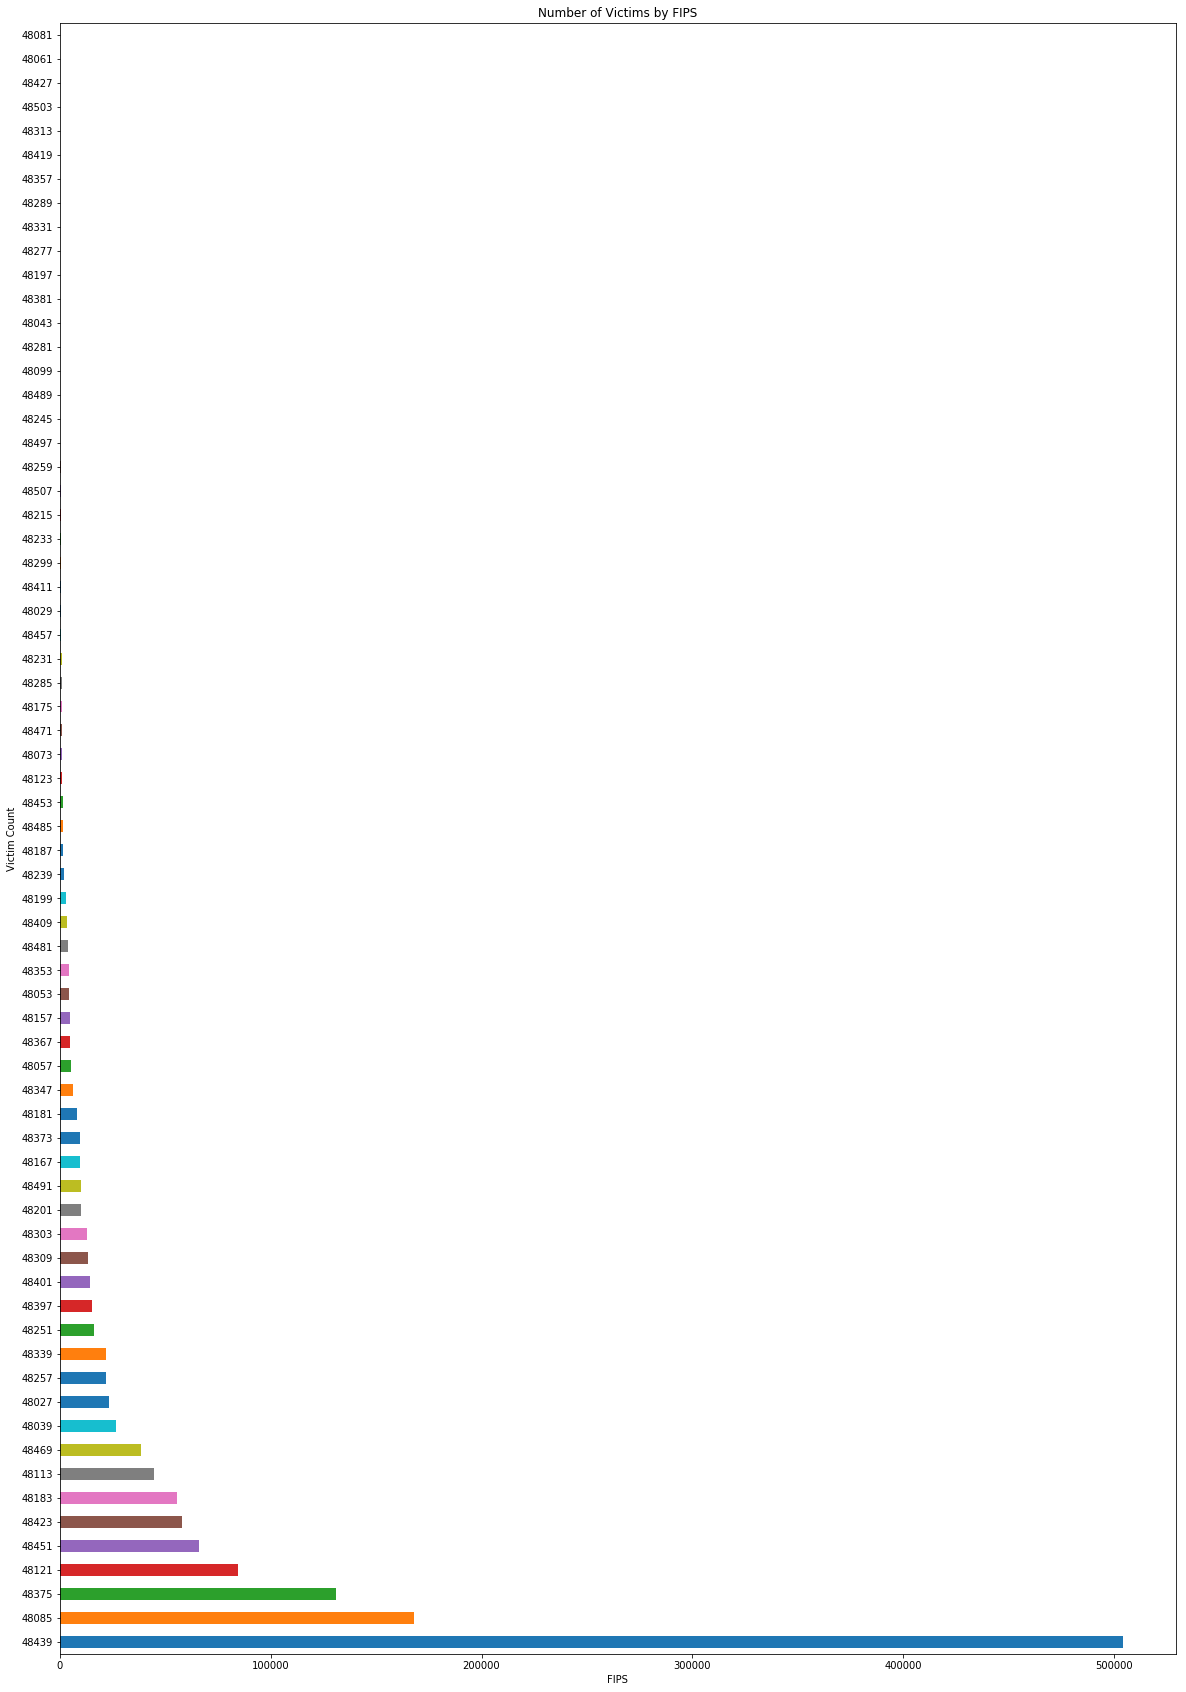

In [25]:
FIPS_Vics.plot.barh(figsize = (20,30))
plt.title('Number of Victims by FIPS')
plt.xlabel('FIPS')
plt.ylabel('Victim Count')
plt.show()